<a href="https://colab.research.google.com/github/Satyajit99p/99-ML-Learning-Projects/blob/master/009/solution/Copy_of_insurance_cross_sell.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/gimseng/99-ML-Learning-Projects/blob/master/009/solution/insurance_cross_sell.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import roc_auc_score,confusion_matrix, classification_report

In [ ]:
import seaborn as sns
sns.set_style("darkgrid")
plt.style.use('ggplot')

In [ ]:
DATA_PATH='https://raw.githubusercontent.com/gimseng/99-ML-Learning-Projects/master/009/data/'

trainData = pd.read_csv(DATA_PATH+'train.csv')
trainData.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
testData = pd.read_csv(DATA_PATH+'test.csv')
testData.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297


In [ ]:
trainData = trainData.drop(['id'], axis = 1)
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                381109 non-null  object 
 1   Age                   381109 non-null  int64  
 2   Driving_License       381109 non-null  int64  
 3   Region_Code           381109 non-null  float64
 4   Previously_Insured    381109 non-null  int64  
 5   Vehicle_Age           381109 non-null  object 
 6   Vehicle_Damage        381109 non-null  object 
 7   Annual_Premium        381109 non-null  float64
 8   Policy_Sales_Channel  381109 non-null  float64
 9   Vintage               381109 non-null  int64  
 10  Response              381109 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 32.0+ MB


In [ ]:
testData = testData.drop(['id'], axis = 1)
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 127037 entries, 0 to 127036
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Gender                127037 non-null  object 
 1   Age                   127037 non-null  int64  
 2   Driving_License       127037 non-null  int64  
 3   Region_Code           127037 non-null  float64
 4   Previously_Insured    127037 non-null  int64  
 5   Vehicle_Age           127037 non-null  object 
 6   Vehicle_Damage        127037 non-null  object 
 7   Annual_Premium        127037 non-null  float64
 8   Policy_Sales_Channel  127037 non-null  float64
 9   Vintage               127037 non-null  int64  
dtypes: float64(3), int64(4), object(3)
memory usage: 9.7+ MB


In [ ]:
#Checking for null values
print(trainData.isnull().sum())
print(" ")
print(testData.isnull().sum())

Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64
 
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64


No value is null

In [ ]:
# checking for consistency in numerical feature columns
trainData.describe()

,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


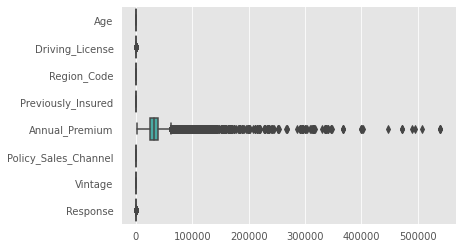

In [ ]:
# Outlier Analysis
df = trainData[trainData.columns]
ax = sns.boxplot(data=df,orient = 'h')

In [ ]:
# from the box plot and statistical description table we realise that the Annual premium insurance
# has high variability (min = 2630 & max = 540165) but the proximity of mean and 50 percentile
# values show that the distribution can be considered stable.

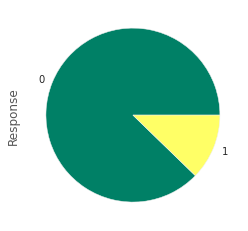

In [ ]:
trainData["Response"].value_counts().plot.pie(colormap = "summer")

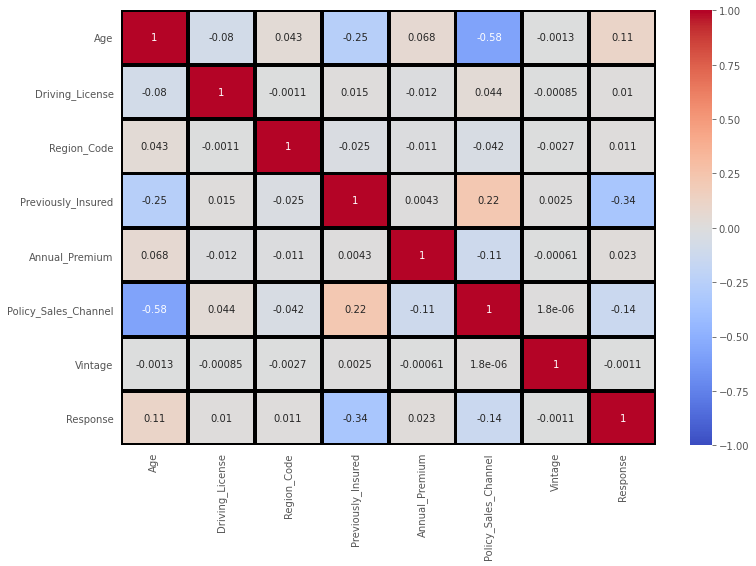

In [ ]:
# checking correlation to eliminate highly corelated features
plt.figure(figsize=(12, 8))
sns.heatmap(trainData.corr(), annot=True,vmin=-1, vmax=1, center= 0, cmap= 'coolwarm', linewidths=3, linecolor='black')

In [ ]:
# As there are completely independent features, we can consider them all.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score,recall_score
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, MinMaxScaler

from sklearn.neighbors import KNeighborsClassifier

from sklearn import preprocessing

In [ ]:
# encoding the numerical columns using Standard Scaler
numCols = ['Age','Region_Code', 'Policy_Sales_Channel', 'Vintage' ]
scaler = StandardScaler()
trainData[numCols] = scaler.fit_transform(trainData[numCols])

#using MinMax encoding for Annual premium feature due to high difference btween maximum and minimum value
scalerM = MinMaxScaler()
trainData[["Annual_Premium"]] = scalerM.fit_transform(trainData[["Annual_Premium"]])

In [ ]:
# encoding the categorical columns using OneHotEncoder

s = (trainData.dtypes == 'object')
object_cols = ['Gender', 'Vehicle_Age', 'Vehicle_Damage']
print(object_cols)

encoder = OrdinalEncoder()
trainData[object_cols] = encoder.fit_transform(trainData[object_cols])


['Gender', 'Vehicle_Age', 'Vehicle_Damage']


In [ ]:
x = trainData.drop(['Response'], axis = 1)
y = trainData['Response']

In [ ]:
x.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1.0,0.333777,1,0.121784,0,2.0,1.0,0.070366,-1.587234,0.748795
1,1.0,2.396751,1,-1.767879,0,0.0,0.0,0.057496,-1.587234,0.342443
2,1.0,0.527181,1,0.121784,0,2.0,1.0,0.066347,-1.587234,-1.521998
3,1.0,-1.148985,1,-1.163187,1,1.0,0.0,0.048348,0.737321,0.581474
4,0.0,-0.633242,1,1.104409,1,1.0,0.0,0.046259,0.737321,-1.378580


In [ ]:
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Response, dtype: int64

In [ ]:
xTrain, xValid, yTrain, yValid = train_test_split(x,y,test_size = 0.4, random_state = 42 )

In [ ]:
#calculating silhoutte score to determine optimum number of clusters
def s_score(neighbours = 11):
  model = KMeans(n_clusters=neighbours)
  model.fit_predict(xTrain)
  return silhouette_score(xTrain, model.labels_, metric = 'euclidean')


In [ ]:
for i in range(2,12):
  print(f'neigbours ={i}  silhoutte score ={s_score(i)}')
  print()

neigbours =2  silhoutte score =0.2502787385949678

neigbours =3  silhoutte score =0.20706154635311733

neigbours =4  silhoutte score =0.20996236642009017

neigbours =5  silhoutte score =0.19611837108096966

neigbours =6  silhoutte score =0.19822826171657373

neigbours =7  silhoutte score =0.19925417237391735

neigbours =8  silhoutte score =0.19643446556601207

neigbours =9  silhoutte score =0.20165828743190414

neigbours =10  silhoutte score =0.19936428581165078

neigbours =11  silhoutte score =0.20476190961584428



In [ ]:
range_k = range(1,15)
scores = {}
scores_list = []
for k in range_k:
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(xTrain, yTrain)
   y_pred = classifier.predict(xValid)
   scores[k] = accuracy_score(yValid,y_pred)
   scores_list.append(accuracy_score(yValid,y_pred))

In [ ]:
scores

{1: 0.8253981790034374,
 2: 0.8643173886804335,
 3: 0.8470323528640025,
 4: 0.8663771614494503,
 5: 0.8560782976043662,
 6: 0.867689118627168,
 7: 0.8611293327385794,
 8: 0.8692175487392092,
 9: 0.8644157854687623,
 10: 0.8706279027052557,
 11: 0.8669019443205374,
 12: 0.8712904410800032,
 13: 0.8683975755031356,
 14: 0.8720841751725223}

Text(0, 0.5, 'Accuracy')

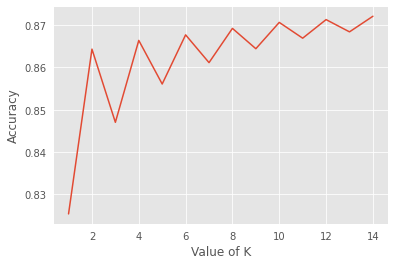

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(range_k,scores_list)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")

In [ ]:
# since our moel performs well for larger even number of neighbours we keep our n_neighbours as 12.
classifier = KNeighborsClassifier(n_neighbors=12)
classifier.fit(xTrain, yTrain)
y_pred = classifier.predict(xValid)
accuracy_score(yValid,y_pred)

0.8712904410800032

In [ ]:
result_cm = confusion_matrix(yValid, y_pred)
print("CONFUSION MATRIX:")
print(result_cm)
print()
result_cr = classification_report(yValid, y_pred)
print("CLASSIFICATION REPORT:")
print (result_cr)
print()
roc_auc = roc_auc_score(yValid, pred_labels, average = 'weighted')
print('ROC AUC SCORE')
print(roc_auc)

CONFUSION MATRIX:
[[131636   1942]
 [ 17679   1187]]

CLASSIFICATION REPORT:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93    133578
           1       0.38      0.06      0.11     18866

    accuracy                           0.87    152444
   macro avg       0.63      0.52      0.52    152444
weighted avg       0.82      0.87      0.83    152444


ROC AUC SCORE
0.5463492154622864


In [ ]:
# FInally predicting on our test data
testData[object_cols] = encoder.fit_transform(testData[object_cols])
print(classifier.predict(testData))

[0 0 0 ... 0 0 0]
